年齢、BMI、運動時間、睡眠時間、食事スコアなどの「生活習慣」から、糖尿病の診断（diagnosed_diabetes）やリスクスコアを予測するモデルを構築。

どの生活習慣（例：睡眠時間 vs 運動時間）が最も発症リスクに寄与しているかを可視化。
健康診断の結果を入力すると将来の病気リスクを予測してくれるツール」にする。


成果物初回カウンセリング　1/5
リスク予測：パーセンテージで表示できそう
人種による差をテーマにする？
生活習慣と糖尿病診断の相関を調べる
まずはEDA データの中身を見る
31カラム、97298行

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

マウントでうまく読み込めず、ファイルをアップロードする方法にした

In [11]:
from google.colab import files

# 実行するとファイル選択ボタンが出ます
uploaded = files.upload()


Saving Diabetes_and_LifeStyle_Dataset .csv to Diabetes_and_LifeStyle_Dataset  (1).csv


In [12]:
# アップロードしたファイル名で読み込み
# (uploaded.keys()でアップロードされたファイル名を取得できます)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(df.head())

   Age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   52  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                

In [13]:
print(df.columns)
print(df.head())

Index(['Age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')
   Age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   52  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   

In [14]:
# '患者ID' というカラム名で、1から始まる連番を作成
df.insert(0, 'ID', range(1, len(df) + 1))

# 確認（最初の5行を表示）
print(df.head())

   ID  Age  gender ethnicity education_level  income_level employment_status  \
0   1   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   2   52  Female     White      Highschool        Middle          Employed   
2   3   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   4   74  Female     Black      Highschool           Low           Retired   
4   5   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  ...  hdl_cholesterol  ldl_cholesterol  \
0                                 215  ...               41              160   
1                                 143  ...               5

In [15]:
df.describe()

,ID,Age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,...,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000,97297.000000
mean,48649.000000,50.192699,2.004543,118.942886,5.995214,6.997708,5.997031,0.219657,0.250912,0.079067,...,185.984234,54.043537,103.000308,121.466407,111.121792,160.014348,9.063591,6.520338,30.222027,0.600039
std,28087.368908,15.492557,1.418060,84.441920,1.780096,1.093726,2.469805,0.414017,0.433540,0.269845,...,32.013395,10.275047,33.390145,43.393422,13.590382,30.938915,4.956342,0.813710,9.065063,0.489892
min,1.000000,19.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,...,100.000000,20.000000,50.000000,30.000000,60.000000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,24325.000000,38.000000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,...,164.000000,47.000000,78.000000,91.000000,102.000000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,48649.000000,51.000000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,...,186.000000,54.000000,102.000000,121.000000,111.000000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,72973.000000,61.000000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,...,208.000000,61.000000,126.000000,151.000000,120.000000,181.000000,12.450000,7.070000,35.600000,1.000000
max,97297.000000,90.000000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,...,318.000000,98.000000,263.000000,344.000000,172.000000,287.000000,32.220000,9.800000,67.200000,1.000000


In [16]:
df.isnull().sum()

,0
ID,0
Age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0


### 数値カラムの可視化（全体）

欠損値なし！
数値データのカラムのみ抽出して可視化

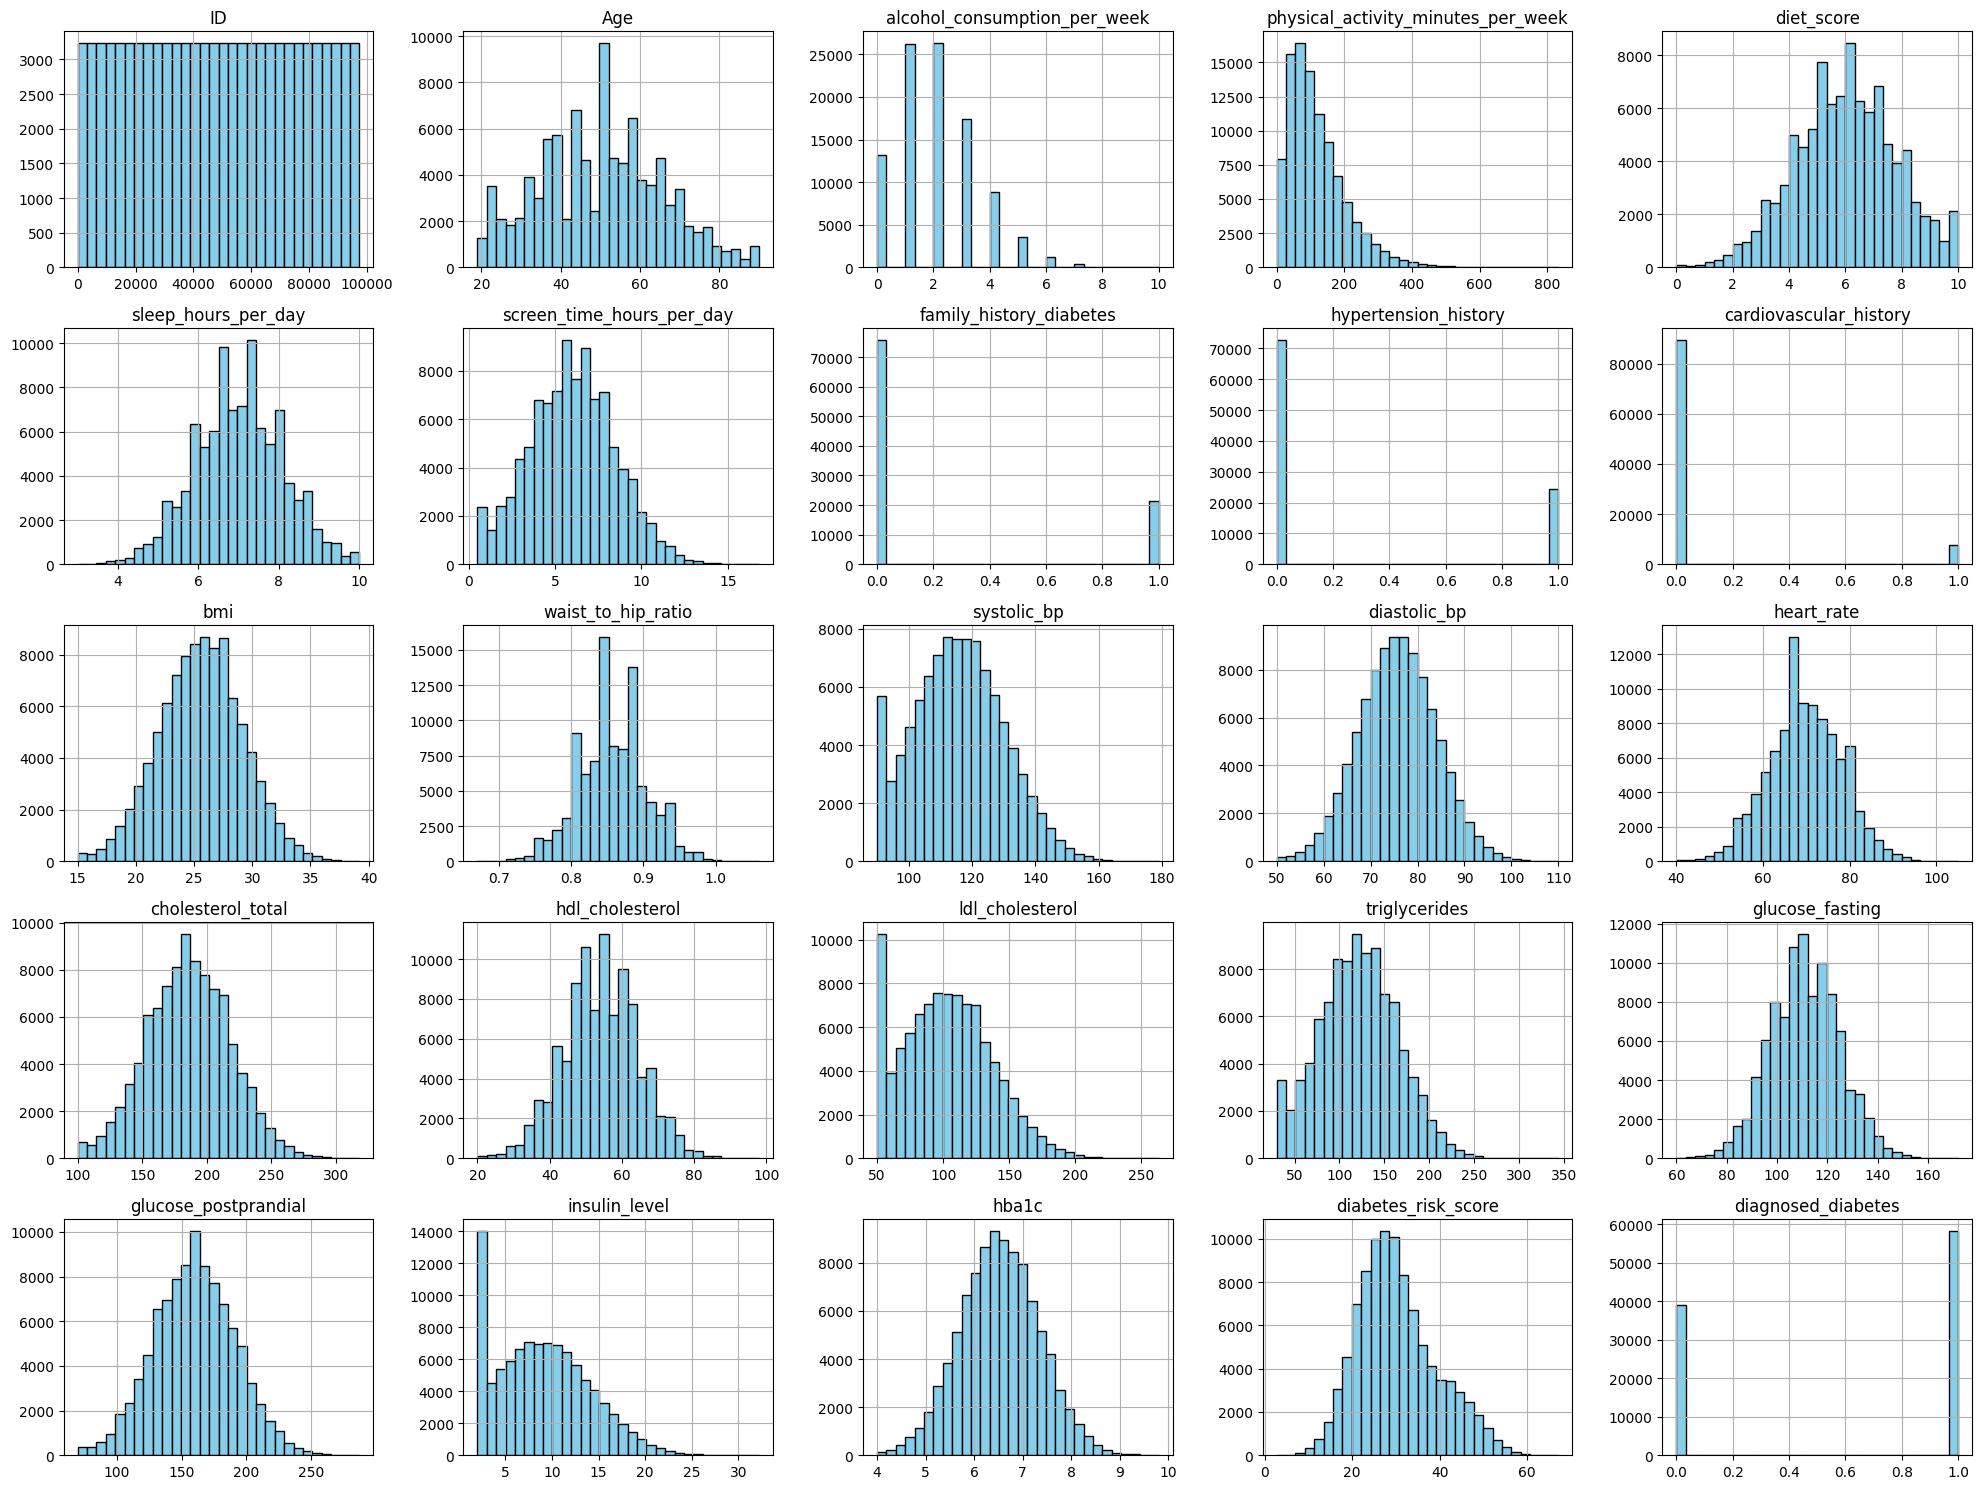

In [17]:
# 数値データを持つカラムのみを抽出してヒストグラムを表示
df.hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

diet_scoreの計算方法は不明だが、健康的な食事レベルである人も多い

DM家族歴なし＞あり
DMと診断 ＞　 no DM
insulin_levelがとても低い数値の集団は1型かどうか確認する
diabetes_risk_scoreの計算方法は不明のため除外する


In [18]:
import seaborn as sns
!pip install japanize-matplotlib
import japanize_matplotlib # 日本語表示用

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d73bab342c0b90957c105fd1b1883c0831d2f91b51a81abf07442397b4029ea2
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


### カテゴリカル変数の可視化（全体）

/tmp/ipython-input-3428463976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-3428463976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-3428463976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-3428463976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

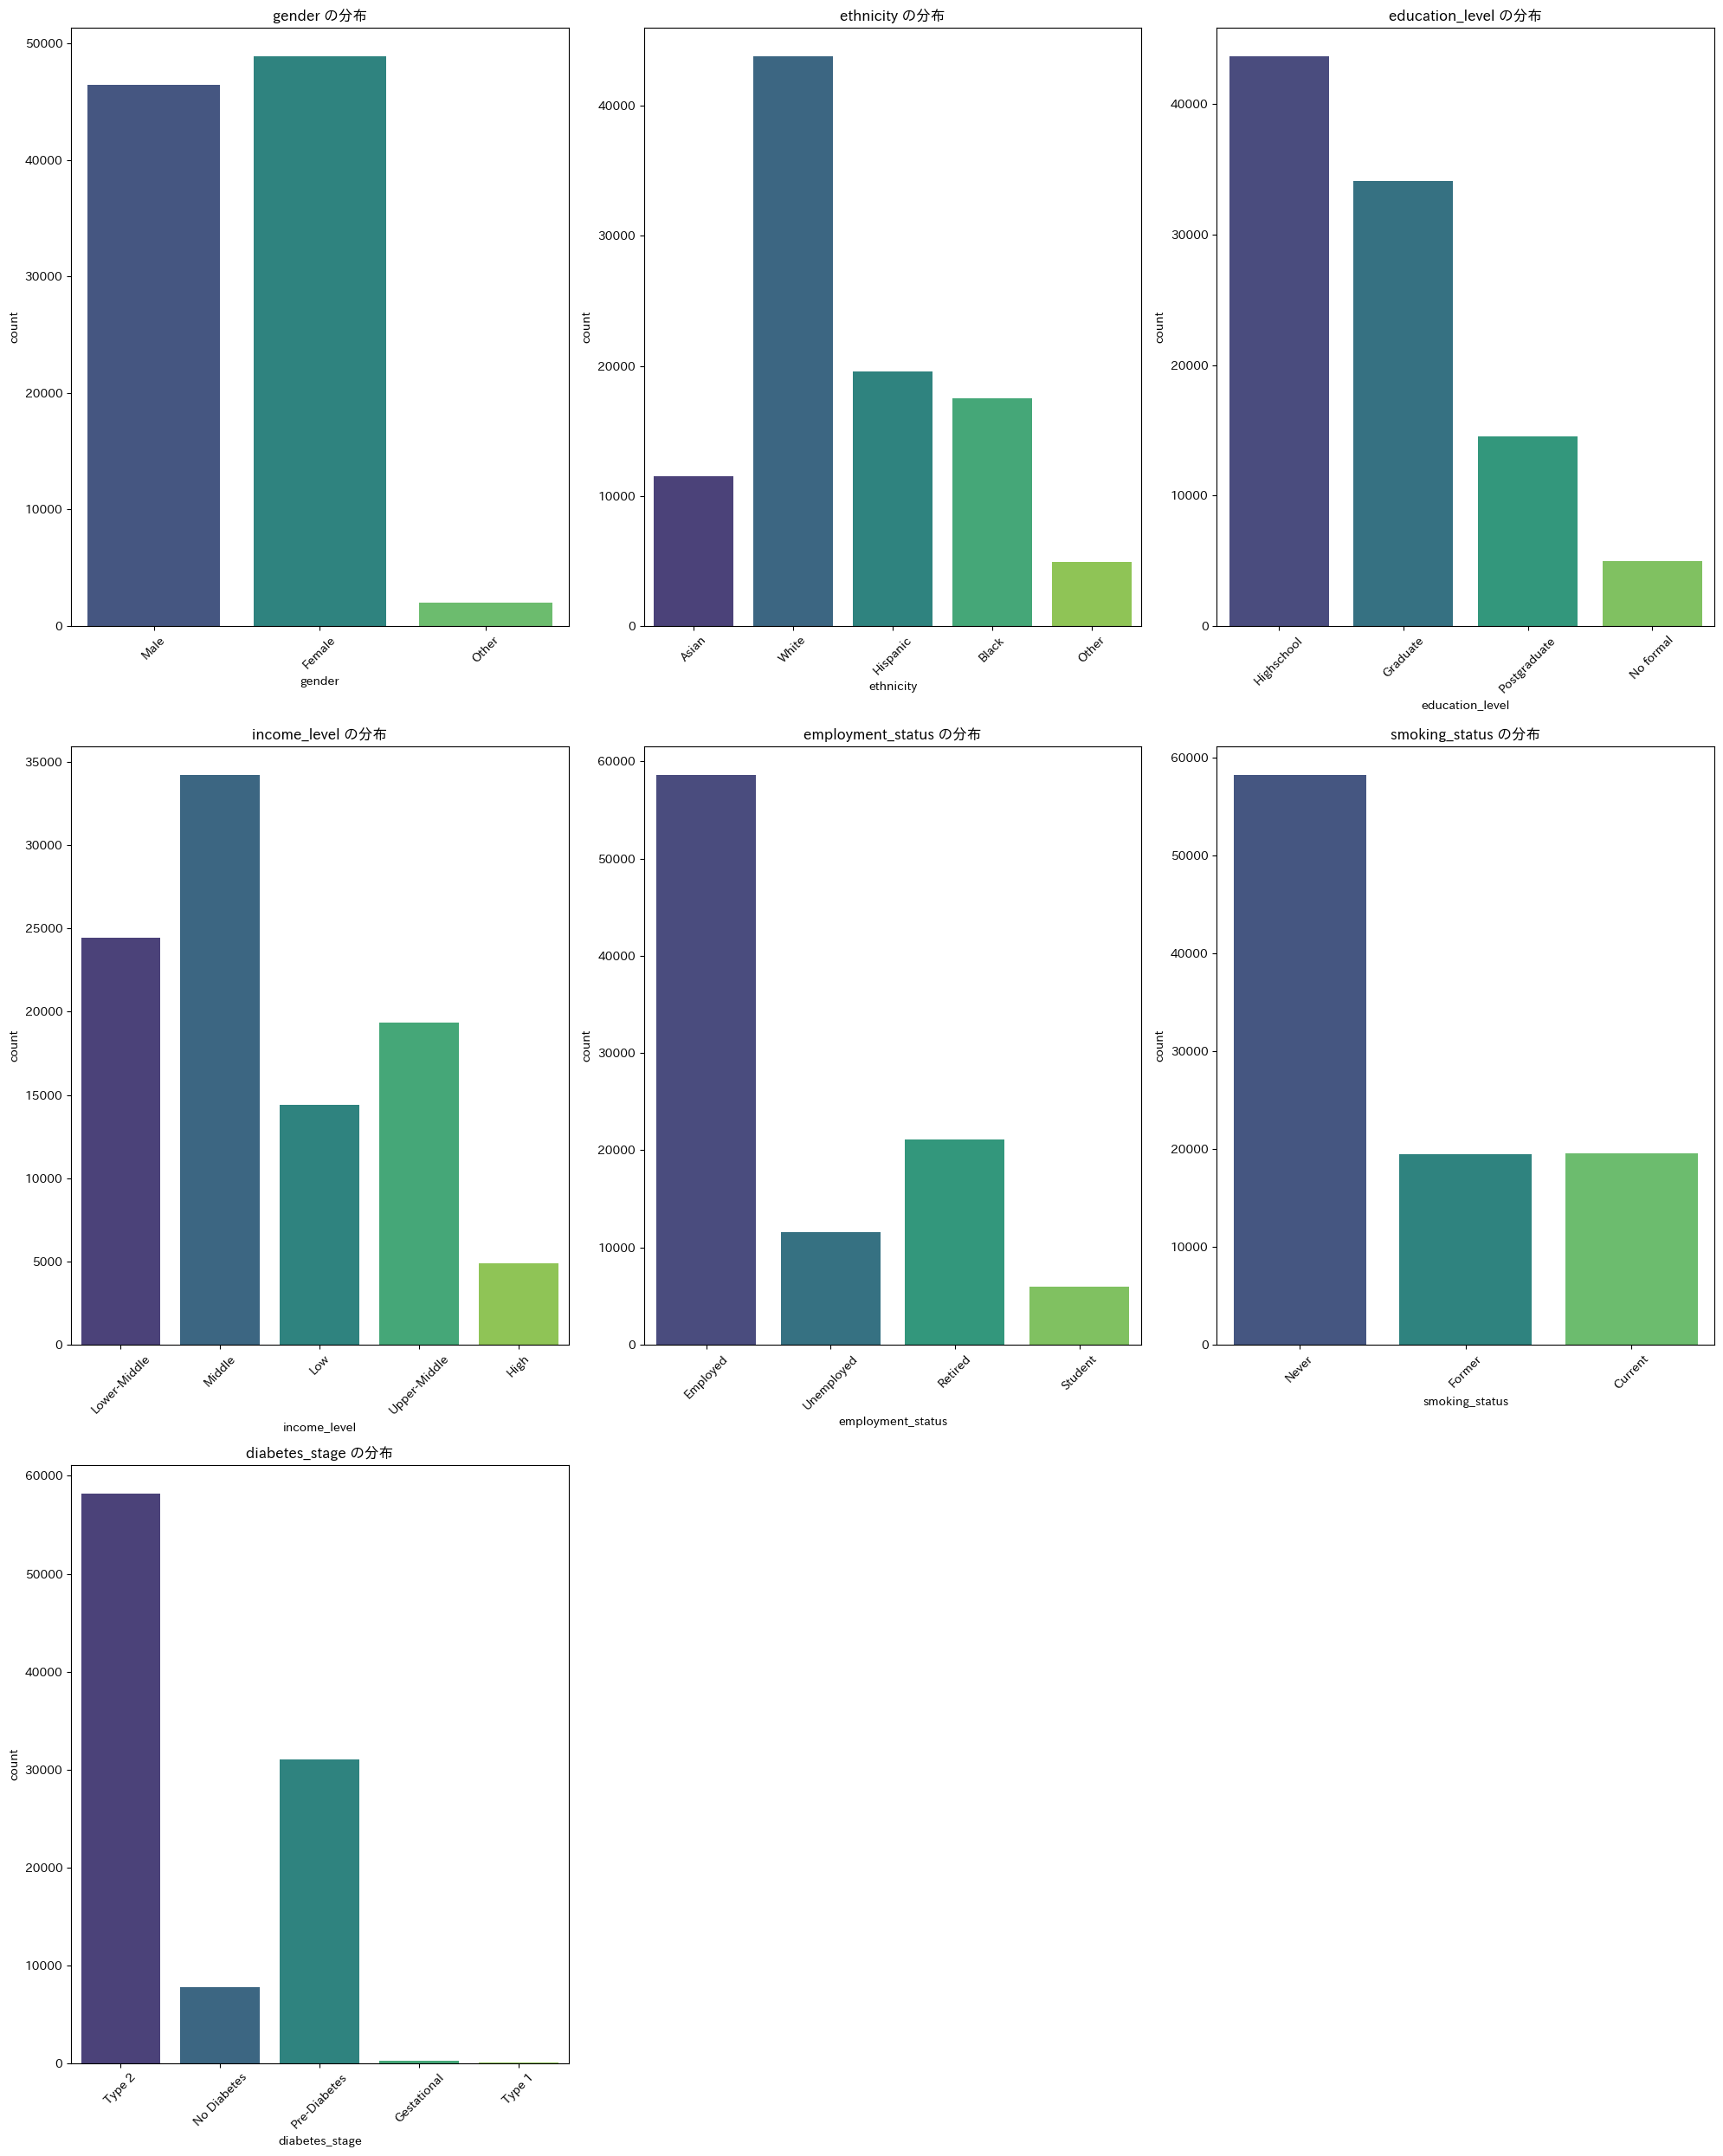

In [19]:
# カテゴリ型のカラム（object型）を抽出
categorical_cols = df.select_dtypes(include=['object']).columns

# グラフの並び方を設定（例：1行に3つずつ）
fig, axes = plt.subplots(len(categorical_cols) // 3 + 1, 3, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} の分布')
    axes[i].tick_params(axis='x', rotation=45)

# 余った空白のグラフを消す
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
#妊娠糖尿病と1型糖尿病は発生機序が異なるので除外
df_clean = df[~df["diabetes_stage"].isin(["Type 1", "Gestational"])]
df_clean["diabetes_stage"].value_counts()

,count
diabetes_stage,
Type 2,58163
Pre-Diabetes,31013
No Diabetes,7737


### 妊娠糖尿病と1型糖尿病を抜いたデータで可視化

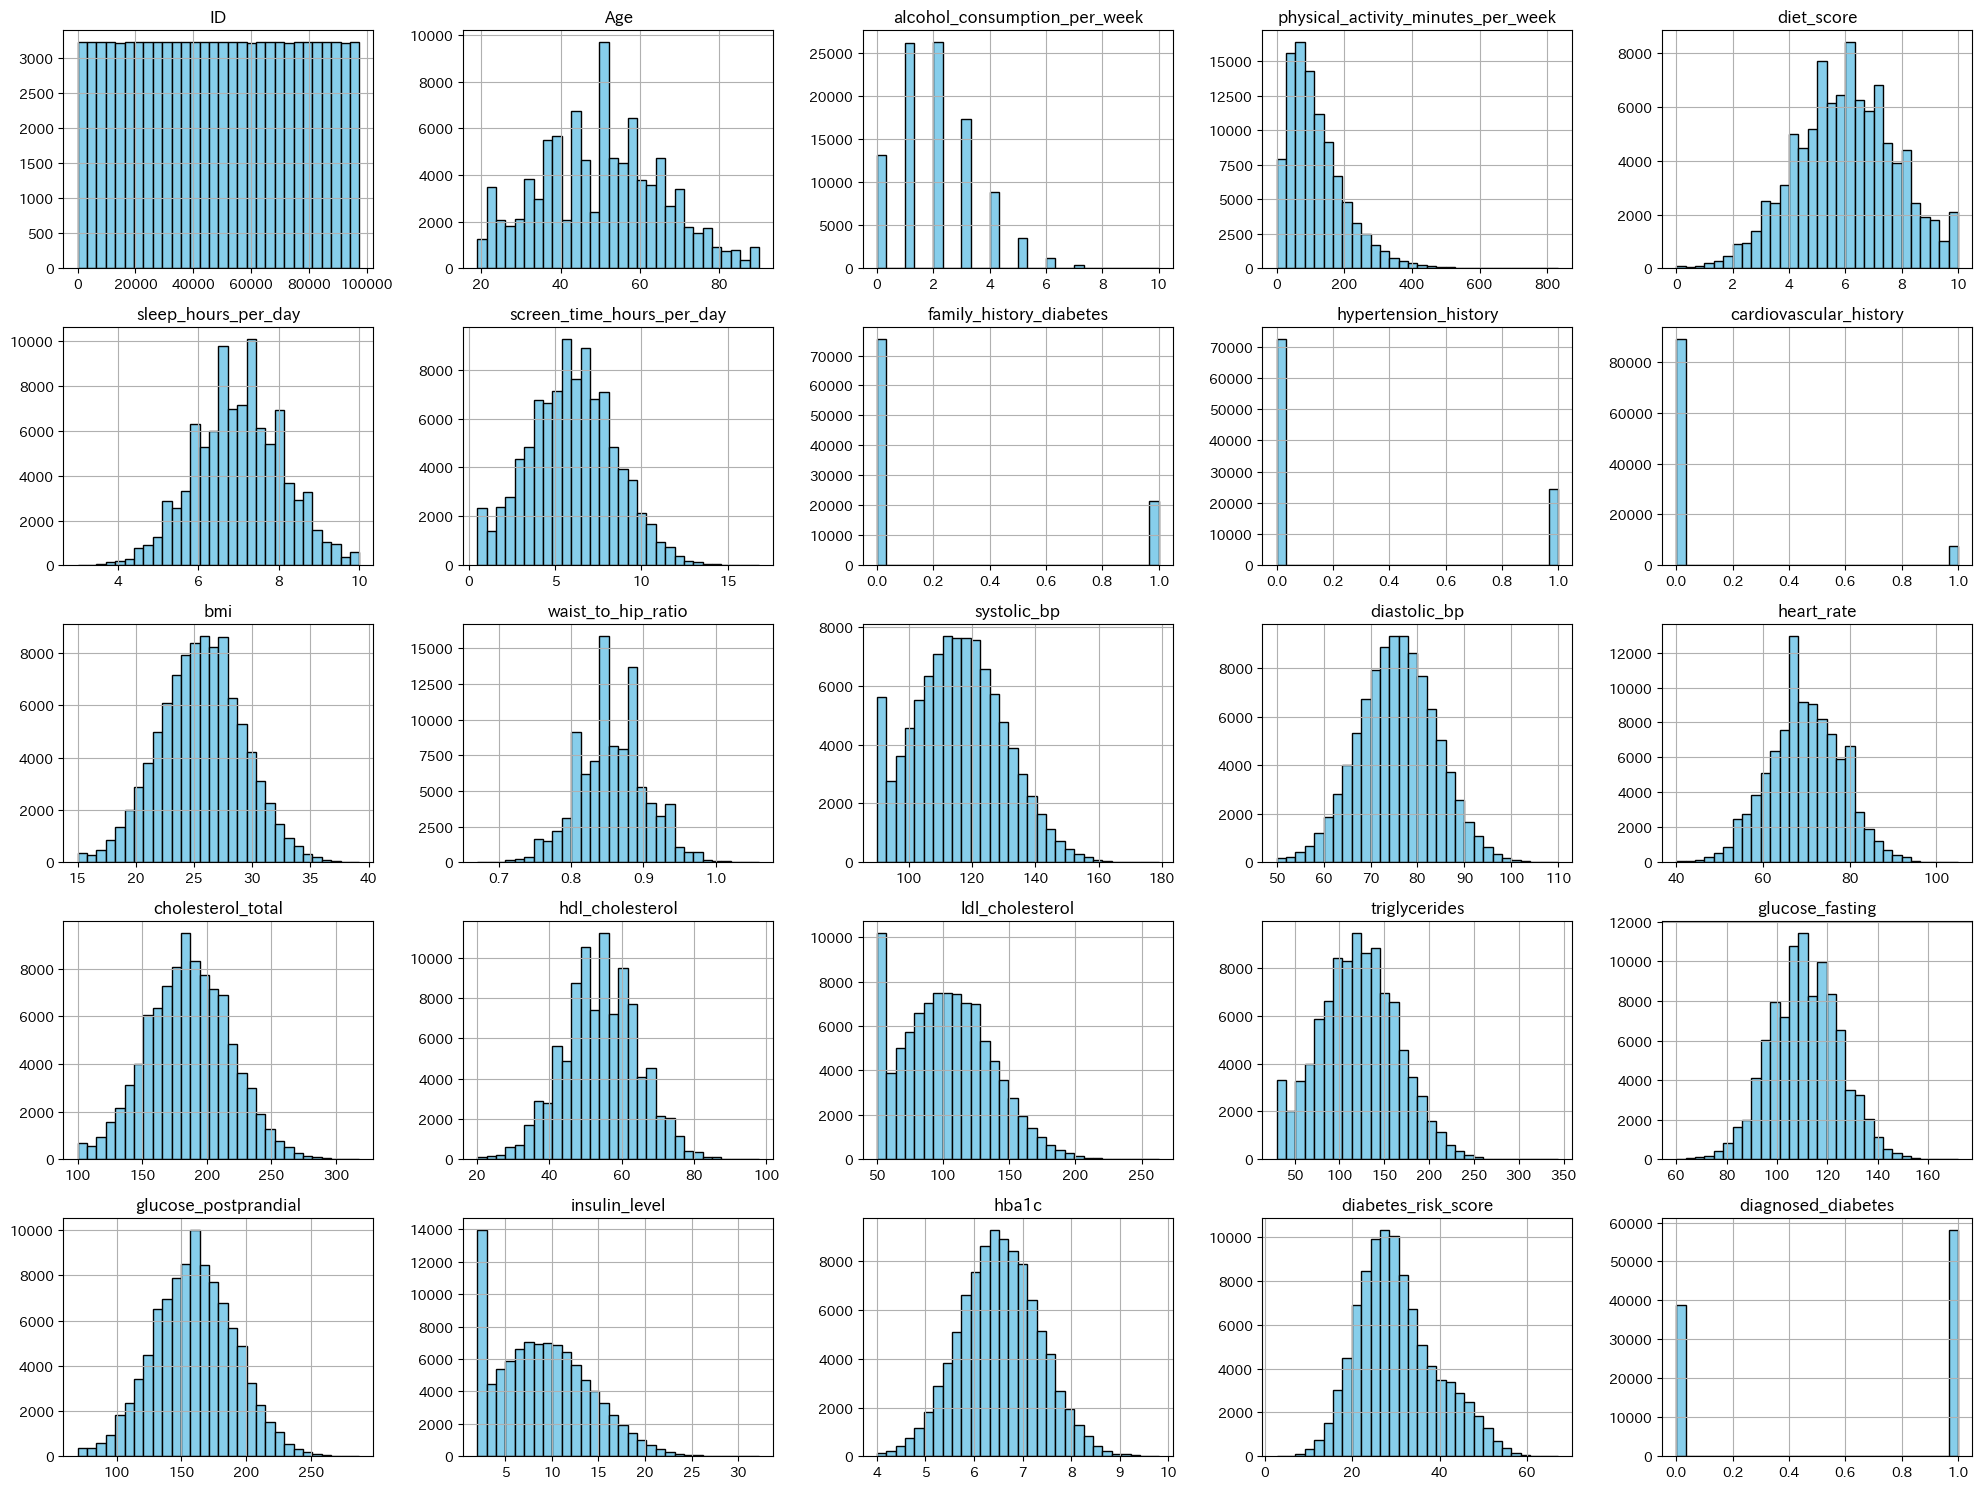

In [21]:
# 妊娠糖尿病と1型糖尿病を抜いたデータで可視化
df_clean.hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

In [22]:
df_clean['bmi'].mean()

np.float64(25.617919164611557)

/tmp/ipython-input-2443078581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2443078581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2443078581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2443078581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

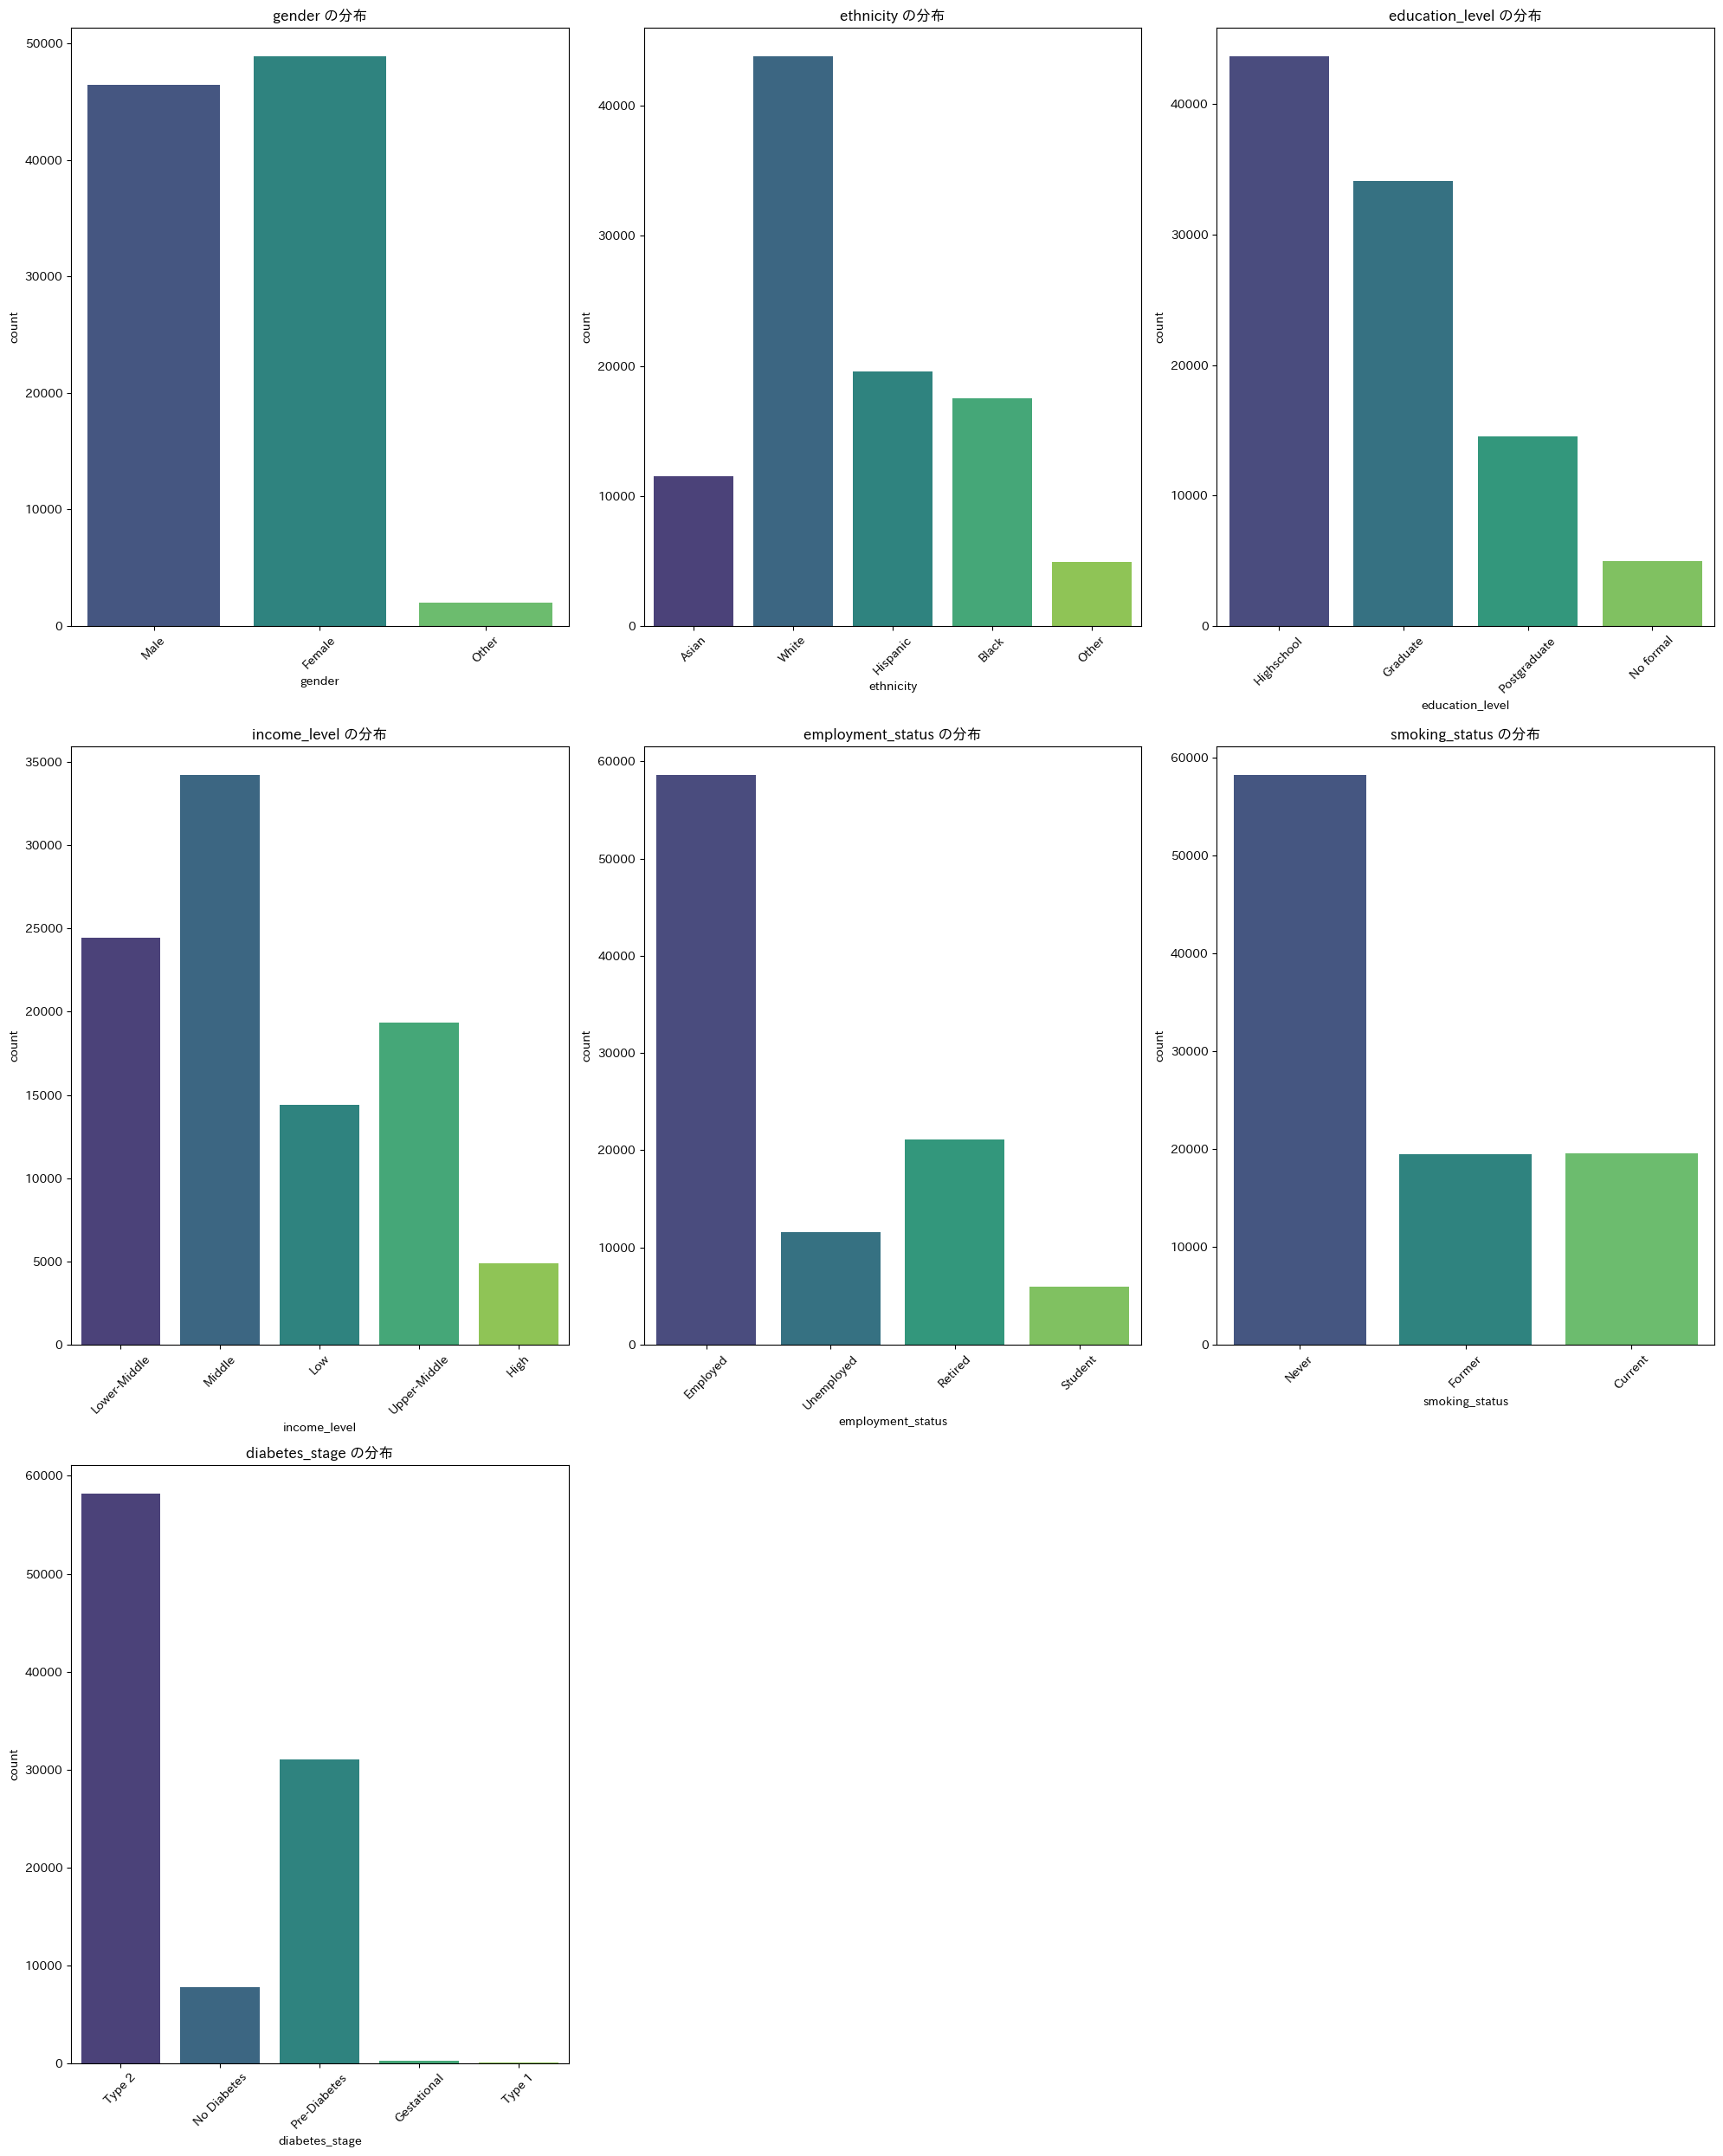

In [23]:
# カテゴリ型のカラム（object型）を抽出
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# グラフの並び方を設定（例：1行に3つずつ）
fig, axes = plt.subplots(len(categorical_cols) // 3 + 1, 3, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} の分布')
    axes[i].tick_params(axis='x', rotation=45)

# 余った空白のグラフを消す
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [24]:
df_clean["diabetes_stage"].isin(["Gestational", "Type 1"]).sum()


np.int64(0)

グラフではGestationalがほんの少しあるけど、データ上は消えていることを確認した
可視化に「0件 or 極少数」が残像のように描かれているだけ　らしい


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96913 entries, 0 to 97296
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  96913 non-null  int64  
 1   Age                                 96913 non-null  int64  
 2   gender                              96913 non-null  object 
 3   ethnicity                           96913 non-null  object 
 4   education_level                     96913 non-null  object 
 5   income_level                        96913 non-null  object 
 6   employment_status                   96913 non-null  object 
 7   smoking_status                      96913 non-null  object 
 8   alcohol_consumption_per_week        96913 non-null  int64  
 9   physical_activity_minutes_per_week  96913 non-null  int64  
 10  diet_score                          96913 non-null  float64
 11  sleep_hours_per_day                 96913 non-

97000行以上とデータが多いので2000行にサンプリングする

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_sample, _ = train_test_split(
    df_clean,
    train_size=2000,
    stratify=df_clean["diagnosed_diabetes"],
    random_state=42
)

In [28]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 39154 to 19740
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  2000 non-null   int64  
 1   Age                                 2000 non-null   int64  
 2   gender                              2000 non-null   object 
 3   ethnicity                           2000 non-null   object 
 4   education_level                     2000 non-null   object 
 5   income_level                        2000 non-null   object 
 6   employment_status                   2000 non-null   object 
 7   smoking_status                      2000 non-null   object 
 8   alcohol_consumption_per_week        2000 non-null   int64  
 9   physical_activity_minutes_per_week  2000 non-null   int64  
 10  diet_score                          2000 non-null   float64
 11  sleep_hours_per_day                 2000 no

In [39]:
len(df_sample)

2000

In [40]:
df_sample.shape

(2000, 32)

In [41]:
df_sample["diagnosed_diabetes"].value_counts(normalize=True)

,proportion
diagnosed_diabetes,
1,0.6
0,0.4


ところでpre_diabetesは糖尿病なのか？

In [32]:
df_clean["diabetes_stage"].value_counts()

,count
diabetes_stage,
Type 2,58163
Pre-Diabetes,31013
No Diabetes,7737


Pre_Diabetesは糖尿病予備軍、糖尿病診断は「なし」である。日本の臨床では境界型糖尿病は糖尿病とみなして治療することも多いが、今回は糖尿病予備軍はDMではないとする。サンプリングする前後でDM有無の割合が変わっていないことを確認した。

In [33]:
df_sample["diabetes_stage"].value_counts()

,count
diabetes_stage,
Type 2,1200
Pre-Diabetes,646
No Diabetes,154


### サンプリング2000 した後の可視化

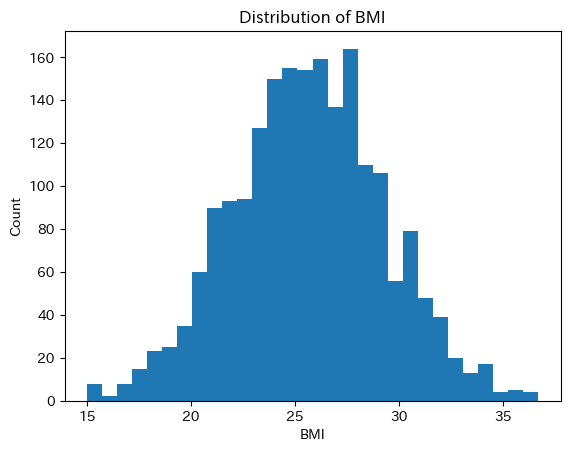

In [34]:
plt.figure()
plt.hist(df_sample['bmi'],bins=30
)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("Distribution of BMI")
plt.show()

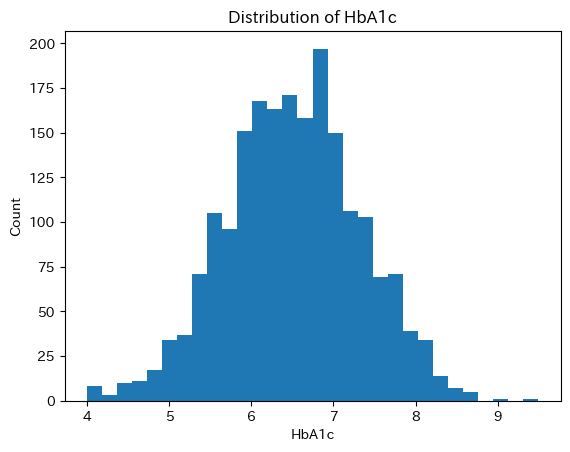

In [35]:
plt.figure()
plt.hist(df_sample["hba1c"], bins=30)
plt.xlabel("HbA1c")
plt.ylabel("Count")
plt.title("Distribution of HbA1c")
plt.show()


 BMIはDM有無であまり変化なし　欧米の人種が多く含まれているからか

<Figure size 640x480 with 0 Axes>

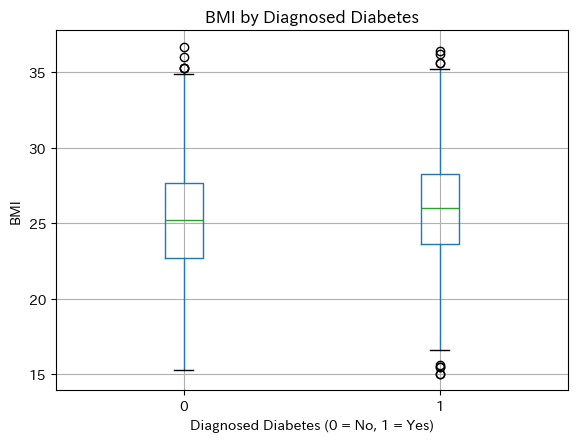

In [36]:
plt.figure()
df_sample.boxplot(column="bmi", by="diagnosed_diabetes")
plt.xlabel("Diagnosed Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.title("BMI by Diagnosed Diabetes")
plt.suptitle("")  # 余計なタイトルを消す
plt.show()


HbA1cはDM有無で明らかに相違点があるが（当たり前）、DMありの中で外れ値が多いことに注目したい

だいたい5.5以下が多い、高い方の外れ値は気にしない

<Figure size 640x480 with 0 Axes>

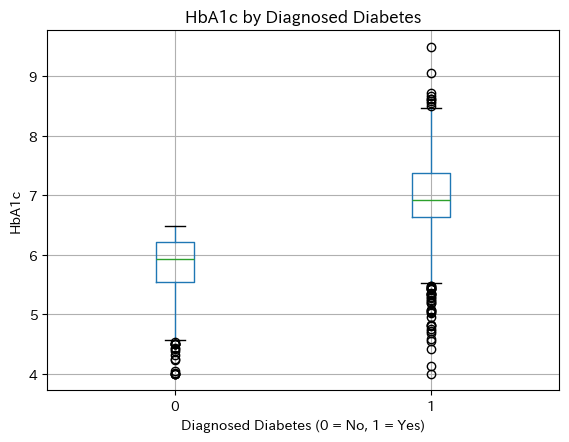

In [37]:
plt.figure()
df_sample.boxplot(column="hba1c", by="diagnosed_diabetes")
plt.xlabel("Diagnosed Diabetes (0 = No, 1 = Yes)")
plt.ylabel("HbA1c")
plt.title("HbA1c by Diagnosed Diabetes")
plt.suptitle("")
plt.show()


DM有無で色分けして重ねているのでただのヒストグラムと少し形が違う

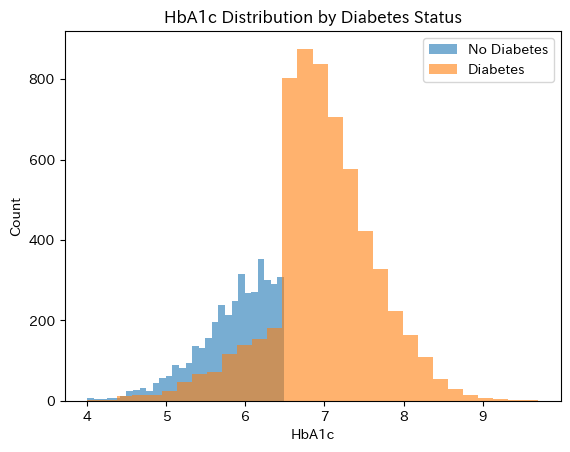

In [48]:
plt.figure()

plt.hist(
    df_big[df_big["diagnosed_diabetes"] == 0]["hba1c"],
    bins=30,
    alpha=0.6,
    label="No Diabetes"
)

plt.hist(
    df_big[df_big["diagnosed_diabetes"] == 1]["hba1c"],
    bins=30,
    alpha=0.6,
    label="Diabetes"
)

plt.xlabel("HbA1c")
plt.ylabel("Count")
plt.title("HbA1c Distribution by Diabetes Status")
plt.legend()
plt.show()


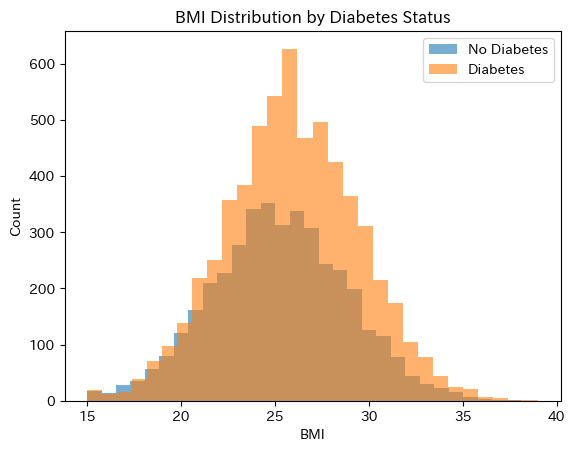

In [49]:
plt.figure()

plt.hist(
    df_big[df_big["diagnosed_diabetes"] == 0]["bmi"],
    bins=30,
    alpha=0.6,
    label="No Diabetes"
)

plt.hist(
    df_big[df_big["diagnosed_diabetes"] == 1]["bmi"],
    bins=30,
    alpha=0.6,
    label="Diabetes"
)

plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution by Diabetes Status")
plt.legend()
plt.show()


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

インスリンが少ない＝糖尿病のはずなのだが、DM:0でもインスリン少ない人は多い

inslin_levelは空腹時の検査のようだから、DMではない人の空腹時インスリンはすごく低くて正しい


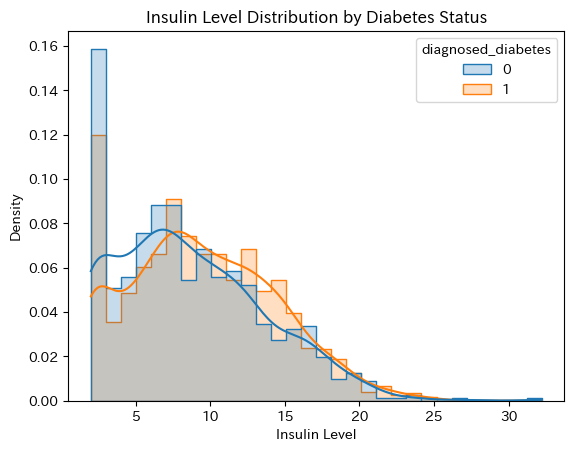

In [44]:
plt.figure()
sns.histplot(
    data=df_sample,
    x="insulin_level",
    hue="diagnosed_diabetes",
    bins=30,
    kde=True,
    element="step",
    stat="density",
    common_norm=False
)

plt.xlabel("Insulin Level")
plt.ylabel("Density")
plt.title("Insulin Level Distribution by Diabetes Status")
plt.show()


インスリンレベルはラボデータのようだが、空腹時インスリンなのか食後インスリンなのか不明

健常人は空腹時2-10、食後30m〜1hで30-60、食後2時間で10-30
2型DM：空腹時でもインスリンを多め（15以上など）に出すことがある
食後すぐにインスリンが出ず、ピークが後ろにずれる（2時間後など）が特徴で、この「出遅れ」のせいで、食後の血糖値が急上昇する。糖尿病進行期になり膵臓が疲弊し、インスリンを作る力が低下すると、数値は全体的に低くなる。

DMなしよりDMありのグラフが右寄りになっている（高め）ことは正しい

人種間で比較をする
**アジア人での糖尿病予測モデルが、他人種にも適応できるのか検証する**

アジア人がサンプリングした2000の中にどれだけいるか確認　少なければサンプリングをやり直すか


In [45]:
df_eval = df_sample[df_sample["ethnicity"].isin(["Asian","White","Black","Hispanic"])]
df_eval["ethnicity"].value_counts()

,count
ethnicity,
White,895
Hispanic,397
Black,367
Asian,238


asianが少なすぎる　学習する時に分割することも考えて、サンプリングを増やす

In [46]:
from sklearn.model_selection import train_test_split
df_big, _ = train_test_split(
    df_clean,  # GDM/1型除外済みの全体
    train_size=10000,
    stratify=df_clean["diagnosed_diabetes"],
    random_state=42
)


In [47]:
df_big["ethnicity"].value_counts()


,count
ethnicity,
White,4532
Hispanic,2042
Black,1776
Asian,1158
Other,492


### サンプル10000

サンプルを10000に増やした。otherは分析に含めないこととし、除外する。

In [ ]:
plt.figure()
plt.hist(df_big["ethnicity"])
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Distribution of Ethnicity")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

counts = df_big["ethnicity"].value_counts()

fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values)

# 人数を表示
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )

ax.set_xlabel("Ethnicity")
ax.set_ylabel("Count")
ax.set_title("Distribution of Ethnicity")

plt.show()


In [ ]:
# otherは混血、少数民族、未回答などを含むと予測し除外
df_eval = df_big[df_big["ethnicity"].isin(
    ["Asian", "White", "Black", "Hispanic"]
)]

In [ ]:
# 学習に使うカラム（説明変数）を指定
# ひとまずベースラインモデルなので最低限の項目とする
feature_cols = [
    "Age",
    "gender",
    "bmi",
    "waist_to_hip_ratio",
    "glucose_fasting",
    "hba1c",
    "insulin_level",
    "diet_score",
    "physical_activity_minutes_per_week",
    "sleep_hours_per_day"
]
# asianを分割
df_asian = df_eval[df_eval["ethnicity"] == "Asian"]

X = df_asian[feature_cols]
y = df_asian["diagnosed_diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 数値の説明変数とカテゴリカル変数をそれぞれ分ける
numeric_features = [
    "Age",
    "bmi",
    "waist_to_hip_ratio",
    "glucose_fasting",
    "hba1c",
    "insulin_level",
    "diet_score",
    "physical_activity_minutes_per_week",
    "sleep_hours_per_day"
]

categorical_features = [
    "gender"
]


### ロジスティック回帰でベースラインモデル

In [ ]:
# 前処理（数値の特徴量に正規化、カテゴリカル変数にOneHotEncoding）＋モデル

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)
model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("classifier", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            random_state=42
        ))
    ]
)


In [ ]:
# Pipelineを使うと、このfitだけで前処理のfit、transform、モデル学習のfitを順番に行う
# asianだけのモデルが構築できた
model.fit(X_train, y_train)


In [ ]:
# asianモデルの精度を評価する
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


かなりいい結果が出た
再現率recall 0.86  見逃しが少なく、
適合率precision　0.92　誤判定も少ない
accuracy 0.87　で全体の正答率も良い
roc-auc 0.913　で　クラス比率の影響を受けにくい指標でも高評価

### asianモデルを他人種に適用

In [ ]:
# asian以外の人種をdf_non_asiaとする
df_non_asian = df_eval[df_eval["ethnicity"] != "Asian"]

In [ ]:
# 人種ごとに分ける
ethnicities = ["White", "Black", "Hispanic"]

In [ ]:
# 人種ごとに分けてモデルで予測し、それぞれの精度を確かめる
from sklearn.metrics import classification_report, roc_auc_score

for eth in ethnicities:
    print(f"\n===== {eth} =====")

    df_eth = df_non_asian[df_non_asian["ethnicity"] == eth]

    X_eth = df_eth[feature_cols]
    y_eth = df_eth["diagnosed_diabetes"]

    y_pred = model.predict(X_eth)
    y_prob = model.predict_proba(X_eth)[:, 1]

    print(classification_report(y_eth, y_pred))
    print("ROC-AUC:", roc_auc_score(y_eth, y_prob))


結論：アジア人のデータは比較的少なかったが構築したモデルは他人種に適用してもうまくはまった
精度はむしろ他人種の方がやや高い
これはアジア人はBMIが低くても糖尿病になる人が多いため、糖尿病のリスクが段階的ではなく連続的に変化している可能性が示唆される。＝閾値ではっきりとDMあり、なしと分けられずなだらかにリスクが変化している
ROC-AUCはリスクの順位を見ているから、リスクの並び順は合っているが、
1本の閾値で切ると取りこぼしが出やすいという結果の数値である

In [ ]:
# 全データから妊娠DMと1型DMを引いたものの人種分布
plt.figure()
plt.hist(df_clean["ethnicity"])
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Distribution of Ethnicity")
plt.show()

全データでもう一度学習、予測、評価を行う

### 全データでの学習（モデルはロジのまま）

In [ ]:
# 全データにおけるasianを分割
df_all_asian = df_clean[df_clean["ethnicity"] == "Asian"]

X = df_all_asian[feature_cols]
y = df_all_asian["diagnosed_diabetes"]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
# Pipelineを使ってるので前処理ももう一度やってくれている

model.fit(X_all_train, y_all_train)

In [ ]:
# 全データでのasianモデルの精度を評価
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_all_test)
y_prob = model.predict_proba(X_all_test)[:, 1]

print(classification_report(y_all_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_all_test, y_prob))

In [ ]:
# asian以外の人種をdf_non_asiaとする
df_all_non_asian = df_clean[df_clean["ethnicity"] != "Asian"]

# 人種ごとに分けてモデルで予測し、それぞれの精度を確かめる

for eth in ethnicities:
    print(f"\n===== {eth} =====")

    df_eth = df_all_non_asian[df_all_non_asian["ethnicity"] == eth]

    X_all_eth = df_eth[feature_cols]
    y_all_eth = df_eth["diagnosed_diabetes"]

    y_pred = model.predict(X_all_eth)
    y_prob = model.predict_proba(X_all_eth)[:, 1]

    print(classification_report(y_all_eth, y_pred))
    print("ROC-AUC:", roc_auc_score(y_all_eth, y_prob))


アジア人と、アジア人以外の人種ではモデルの性能の差は誤差の範囲内であった（0.01）。また、サンプルデータで観察されたアジア人における性能の僅かな低下は、全データを用いた検証では再現されなかった。全件データにおいては、再現率および ROC-AUC ともに高い値を示しており、アジア人に対する糖尿病予測が特別に困難であるとは言えない結果となった。

### ロジスティック回帰のパラメータ調整

In [ ]:
# パラメータを追加してモデルをインスタンス化
model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("classifier", LogisticRegression(
            max_iter=3000,
            class_weight="balanced",
            C=1.0,
            penalty="l2",
            solver="lbfgs",
            random_state=42
        ))
    ]
)


In [ ]:
# グリッドサーチでサーチする
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__solver": ["lbfgs", "liblinear"],
    "classifier__penalty": ["l2"]  # liblinearもlbfgsもl2対応
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="recall",      # DMあり(=1)のRecallを重視
    cv=5,
    n_jobs=-1
)
# 複数のパラメータ候補についてそれぞれの候補ごとに Pipeline を作り何度もfitさせて探索
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV recall:", grid.best_score_)

best_model = grid.best_estimator_
# 最適なパラメータが確定したpipelineをAsianのtrainデータ全体で改めてfitしたもの
# pipeline で前処理＋学習もやっているのでさらに学習はしなくていい

In [ ]:
# サンプルのアジア人テストデータ（パラメータ調整後）
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\n=== Asian TEST (tuned) ===")
print(classification_report(y_test, y_pred))


In [ ]:
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

In [ ]:
# 全データでのasianモデルの精度を評価（パラメータ調整後）
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_all_test)
y_prob = best_model.predict_proba(X_all_test)[:, 1]

print(classification_report(y_all_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_all_test, y_prob))

In [ ]:
# 全データのアジア人以外のデータ（パラメータ調整後）
# asian以外の人種をdf_non_asiaとする
df_all_non_asian = df_clean[df_clean["ethnicity"] != "Asian"]

# 人種ごとに分けてモデルで予測し、それぞれの精度を確かめる

for eth in ethnicities:
    print(f"\n===== {eth} =====")

    df_eth = df_all_non_asian[df_all_non_asian["ethnicity"] == eth]

    X_all_eth = df_eth[feature_cols]
    y_all_eth = df_eth["diagnosed_diabetes"]

    y_pred = best_model.predict(X_all_eth)
    y_prob = best_model.predict_proba(X_all_eth)[:, 1]

    print(classification_report(y_all_eth, y_pred))
    print("ROC-AUC:", roc_auc_score(y_all_eth, y_prob))

ハイパーパラメータ（正則化強度 C 等）の調整を行ったが、主要な評価指標（Recall、ROC-AUC）に大きな変化は見られなかった。全データを用いた検証では、アジア人に対する適合率が約 0.02 向上した。一方で、再現率および ROC-AUC は概ね同程度であり、モデル全体の性能傾向はサンプルデータでの結果と一致していた。

### 特徴量追加


In [ ]:
# 学習に使うカラム（説明変数）を指定
# ひとまずベースラインモデルなので最低限の項目とする
feature_cols = [
    "Age",
    "gender",
    "bmi",
    "waist_to_hip_ratio",
    "glucose_fasting",
    "hba1c",
    "insulin_level",
    "diet_score",
    "physical_activity_minutes_per_week",
    "sleep_hours_per_day",
    "alcohol_consumption_per_week"
]
# asianを分割
df_asian = df_eval[df_eval["ethnicity"] == "Asian"]

X = df_asian[feature_cols]
y = df_asian["diagnosed_diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
numeric_features = [
    "Age",
    "bmi",
    "waist_to_hip_ratio",
    "glucose_fasting",
    "hba1c",
    "insulin_level",
    "diet_score",
    "physical_activity_minutes_per_week",
    "sleep_hours_per_day",
    "alcohol_consumption_per_week"
]
categorical_features = [
    "gender"
]


In [ ]:
# 全データにおけるasianを分割
df_all_asian = df_clean[df_clean["ethnicity"] == "Asian"]

X = df_all_asian[feature_cols]
y = df_all_asian["diagnosed_diabetes"]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
# 前処理（数値の特徴量に正規化、カテゴリカル変数にOneHotEncoding）＋モデル

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)
model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("classifier", LogisticRegression(
            max_iter=3000,
            class_weight="balanced",
            C=1.0,
            penalty="l2",
            solver="lbfgs",
            random_state=42
        ))
    ]
)


In [ ]:
model.fit(X_train, y_train)

In [ ]:
# asianモデルの精度を評価する
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


In [ ]:
#全アジア人データ
y_pred = model.predict(X_all_test)
y_prob = model.predict_proba(X_all_test)[:, 1]

print(classification_report(y_all_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_all_test, y_prob))

In [ ]:
# 人種ごとに分けてモデルで予測し、それぞれの精度を確かめる

for eth in ethnicities:
    print(f"\n===== {eth} =====")

    df_eth = df_all_non_asian[df_all_non_asian["ethnicity"] == eth]

    X_all_eth = df_eth[feature_cols]
    y_all_eth = df_eth["diagnosed_diabetes"]

    y_pred = model.predict(X_all_eth)
    y_prob = model.predict_proba(X_all_eth)[:, 1]

    print(classification_report(y_all_eth, y_pred))
    print("ROC-AUC:", roc_auc_score(y_all_eth, y_prob))

# 一番下
